In [8]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()
from ipywidgets import IntProgress

In [9]:
# configs --------------------------------

class Configs:
    def __init__(self, lattice_size):
        self.lattice_size = lattice_size
        self.lattice = np.zeros([self.lattice_size, self.lattice_size])
        
        # the bottom layer is full
        self.lattice[0] = np.ones(200)
        
    # we have to call reset each time we want to use lattice for the first time to initiate it with zero values
    def reset(self):
        self.lattice = np.zeros([self.lattice_size, self.lattice_size])

        # the bottom layer is full
        self.lattice[0] = np.ones(200)
        
configs = Configs(lattice_size=200)

In [10]:
# helper function -------------------------

def check_the_neighbours(x: int, y: int, max_height: int, lattice: np.ndarray, lattice_size: int, number_of_deposited_layers: int):
    '''
        we get the x and y of the point and find its neighbours and if has any neighbour
        it means we have to fix its position.
        
        max_height is the height of the box that is full and has the max height
        
        note that when we give an array to the function python gives that arrays address
        so when we change that array, real array will change.
        
        here lattice has to be a (n, n) array
        
        and note that due to our implementation max height of a branch will be lattice_size-2
    '''
    
    # change the color after each 1000 layer deposited
    # "+1" is for first 1000 layer that don't have to have 0 color value
    color_value = (number_of_deposited_layers // 1000) + 1
    
    # checking if the point is in the out of the boundary
    if y > max_height + 20:
        return "went out"
    
    # checking if the point is above the height of the lattice and under the boundary
    # with this implementation max height of a branch will be lattice_size-2
    # we do this to avoid some exception handling
    elif y >= lattice_size-1:
        return "at the top"
        
    # checking the bottom and top and left and neighbours of the right boundary
    elif (x == lattice_size-1) and (lattice[y-1, x] or lattice[y+1, x] or lattice[y, x-1] or lattice[y, 0]):
        lattice[y, x] = color_value
        return "sticked"
        
    # checking the bottom and top and left and right neighbours
    elif (x != lattice_size-1) and (lattice[y-1, x] or lattice[y+1, x] or lattice[y, x-1] or lattice[y, x+1]):
        lattice[y, x] = color_value
        return "sticked"
    
    # it has no neighbours
    else:
        return "no neighbours"

In [11]:
# helper function -------------------------

def handle_progress_bars(max_number_of_layers: int, lattice_size: int):
    # instantiate the progress bar
    number_of_deposited_layers_progress_bar = IntProgress(min=0, max=max_number_of_layers)
    
    print("number of deposited layers:")
    print(f"0                                    {max_number_of_layers}")
    
    # display the progress bar
    display(number_of_deposited_layers_progress_bar) 

    # instantiate the progress bar
    max_height_progress_bar = IntProgress(min=0, max=lattice_size-2)
    
    print("height of the branch with the maximum height:")
    print(f"0                                      {lattice_size-2}")
    
    # display the progress bar
    display(max_height_progress_bar)
    
    return [number_of_deposited_layers_progress_bar, max_height_progress_bar]

In [12]:
# main function --------------------------

def random_walk(p: float, max_number_of_layers: int):
    '''
        choose a random point and do a random walk and check the neighbours
        and some exceptions and lose the point or stick it to a neighbour.
    '''
    
    # to initiate the lattice again
    configs.reset()
    
    lattice = configs.lattice
    lattice_size = configs.lattice_size
    
    # the height of the branch with the maximum height
    max_height = 1
    
    # number of deposited layers
    number_of_deposited_layers = 1
    
    number_of_deposited_layers_progress_bar, max_height_progress_bar = handle_progress_bars(max_number_of_layers, lattice_size)
    
    while  number_of_deposited_layers <= max_number_of_layers:
        number_of_deposited_layers_progress_bar.value =  number_of_deposited_layers
        
        x = np.random.randint(0, lattice_size)
        y = max_height + 5

        # deposit one layer
        while True:
            if np.random.binomial(1, p):
                x += 1
                if x == lattice_size:
                    x = 0
            else:
                x -= 1
                if x == -1:
                    x == lattice_size-1
                    
            if np.random.binomial(1, p):
                y += 1
            else:
                y -= 1   

            response = check_the_neighbours(x, y, max_height, lattice, lattice_size, number_of_deposited_layers)
            
            if response == "went out":
                break
                
            elif response == "sticked":
                number_of_deposited_layers += 1
                if y > max_height:
                    max_height = y
                    max_height_progress_bar.value = max_height
                break
        
        
        # when a branch reach the max height we are done
        if max_height >= configs.lattice_size-2:
            print("*** a branch riched the maximum height ***")
            print(f"number of deposited layers: {number_of_deposited_layers}")
            
            break

In [13]:
# starter function --------------------------

def start():
    max_number_of_layers = int(input("max number of layers: "))

    # do the random walks and depositions
    random_walk(p=1/2, max_number_of_layers=max_number_of_layers)
    
    # plot the results
    plt.grid(None)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("deposition with random walk")

    plt.imshow(configs.lattice, origin="lower")
    plt.colorbar(label="relative time of deposition")

max number of layers:  10000


number of deposited layers:
0                                    10000


IntProgress(value=0, max=10000)

height of the branch with the maximum height:
0                                      198


IntProgress(value=0, max=198)

*** a branch riched the maximum height ***
number of deposited layers: 5882


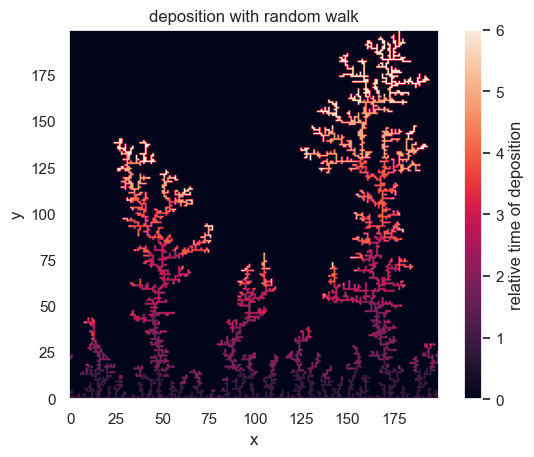

In [14]:
start()

max number of layers:  10000


number of deposited layers:
0                                    10000


IntProgress(value=0, max=10000)

height of the branch with the maximum height:
0                                      198


IntProgress(value=0, max=198)

*** a branch riched the maximum height ***
number of deposited layers: 5561


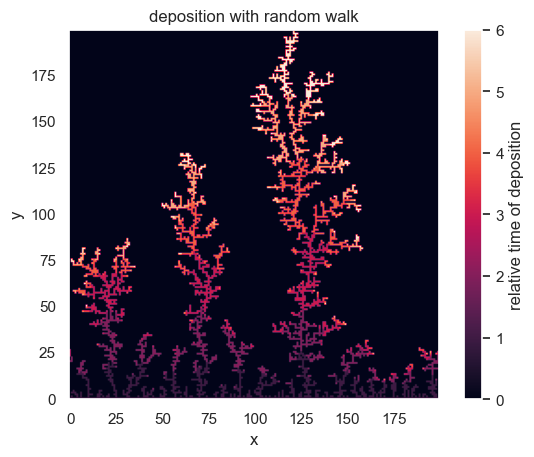

In [16]:
start()